In [1]:
import pytesseract
from PIL import Image
import os 
from PIL import Image
import pytesseract
from openai import OpenAI
from dotenv import load_dotenv
import nest_asyncio
from pathlib import Path
import fitz
import base64
from IPython.display import display, Image as IPImage

current_directory = os.getcwd()
print("Current Directory:", current_directory)  # พิมพ์ที่อยู่ปัจจุบัน

# ปรับเส้นทางไปยังไฟล์ .env ในโฟลเดอร์ venv
env_path = Path(current_directory).parent.parent / 'venv' / '.env'
print("Env Path:", env_path)  # พิมพ์เส้นทางที่ไปยัง .env

load_dotenv(dotenv_path=env_path)


nest_asyncio.apply()

Current Directory: c:\Users\user\OneDrive\Desktop\Test_BOT\test\OCR
Env Path: c:\Users\user\OneDrive\Desktop\Test_BOT\venv\.env


In [3]:
# keys for the services we will use
OPENAI_API_KEY : str 
GROQ_API_KEY : str
LANGCHAIN_API_KEY : str
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
# LANGCHAIN_API_KEY = os.getenv('LANGCHAIN_API_KEY')


In [4]:
# ---------- ตั้งค่าเบื้องต้น ----------
file_path = "./test_data/ปัญหาถามตอบ สำนักคอม.docx.pdf"
image_dir = "extracted_images"
os.makedirs(image_dir, exist_ok=True)

In [5]:
# ---------- ดึงรูปภาพจาก PDF ----------
doc = fitz.open(file_path)
images_b64 = []
image_filenames = []

for page_index in range(len(doc)):
    page = doc.load_page(page_index)
    images = page.get_images(full=True)

    for img_index, img in enumerate(images):
        xref = img[0]
        base_image = doc.extract_image(xref)
        image_bytes = base_image["image"]
        image_ext = base_image["ext"]
        image_filename = f"page{page_index+1}_img{img_index+1}.{image_ext}"
        image_path = os.path.join(image_dir, image_filename)

        with open(image_path, "wb") as f:
            f.write(image_bytes)

        images_b64.append(base64.b64encode(image_bytes).decode("utf-8"))
        image_filenames.append(image_filename)

print(f"Total Image: {len(images_b64)} รูป")


Total Image: 13 รูป


In [6]:
# ---------- OCR อ่านข้อความจากรูป ----------
ocr_texts = []
custom_config = r'--oem 3 --psm 6'

for filename in image_filenames:
    file_path = os.path.join(image_dir, filename)

    if file_path.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        try:
            img = Image.open(file_path)
            raw_text = pytesseract.image_to_string(img, lang='tha+eng', config=custom_config)
            ocr_texts.append((filename, raw_text))
        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")

print(f"OCR เสร็จแล้วทั้งหมด {len(ocr_texts)} ไฟล์")


OCR เสร็จแล้วทั้งหมด 13 ไฟล์


In [7]:
print(ocr_texts)

[('page1_img1.jpeg', '[ ล ะ ห ล ส อ บ โ ด ย ล อ ก ล น\nเ จ ทีฉ ม บ ก ห ซ์\nอ า ม ค ม บ ะ กั ที า ใ ม ไ ด้\n2 - อิ น เ ด อ ดิ ม็ ด\nWw - ค ม บ ส า ร ส แ ท ต ภ า ย โ ซ เ ห า ริ ย ย า ส ย\n~ AD ห ย ช่ น โ ป แ จ ง ท่ รั บ ล อ ย แ ล ะ | า\n- ม โ ช ล อ เ ช่ น ร า ม บ ล ง ห ล เ บี ย น ร ะ เ ริ ญ ญ า กา ร ะ ก า ริ ง า น ห า\n- ทุ\nป =e\n1 ศ ส ม า น โ ม อ ก อ อ ง ( ห ด น ศ ส ผ า น )\n[ ปั ณ ย์ ห ร ค อ า ย ( เ จ้ ง แ อ ด มิ น ส อ อ า ย )\nก น พ ร ๕ ญ ช์\n- เ ป น มิ ด เ า ใ ห ม่\n- เ ช น สิ ด ย า ย ค ณ ช ภ า ค ริ ช า\n- เ ขี ย ม ค ล า ก ทํา น .\n2 อ ก ล บั ญ ช ช็ติ ษ ย์ า พ น ส ภ า พ\n'), ('page2_img1.jpeg', 'อิ น ต ะ ร์ ด โ ช ไ มิ ด\nน บ์\nwifi Zaavts\nwi\n‘biti Ww ใ จ อ า ม ภา 8 2\nค อ ม แ ส ด ง ห นำ จ อ 109 in? เ ต ศ ษ อุ ย ล ะ ศ ล\nวั ย ศ 8 ะ ต ด ต่ อ แ อ ด ม น ล า น ก /\nแ อ ค ธ น ส่ น ง า น\nแ ส ด ง\nWw\nมิ ด ก น\n'), ('page3_img1.jpeg', 'ลํ ง ก า ย า น ใ น\nMS team ไ ม ด\nwi แ ร ง ช า ร า ร รั ส อ น\nเ พ ม ช จ า ใ น แ ม น\nห ล ส อ บ\n‘bili\n'), ('page4_img1.jpeg', "ข อ ธ ธิ ย ย์ เ ชื อ ง ร

In [8]:
# ---------- ฟังก์ชันแสดงภาพจาก base64 ----------
def display_base64_image(base64_code):
    image_data = base64.b64decode(base64_code)
    display(IPImage(data=image_data))

# i=0  # change index look another image
# filename, raw_text = ocr_texts[i]
# print(f"✅ แสดงภาพ: {filename}")
# display_base64_image(images_b64[i])


In [ ]:
client = OpenAI(api_key=OPENAI_API_KEY)


# กำหนด prompt สำหรับวิเคราะห์ภาพ
prompt = """
ข้อมูลต่อไปนี้ถูกรวบรวมมาจากหลายแหล่งไฟล์ เช่น PDF, Word, Excel หรือ CSV ซึ่งอาจอยู่ในรูปแบบข้อความทั่วไป ตาราง หรือภาพประกอบ


    โปรดตอบกลับในรูปแบบที่กระชับ เข้าใจง่าย และสุภาพเสมือนเป็นเจ้าหน้าที่ให้ความช่วยเหลือ โดยยึดแนวทางดังนี้:

    - ตอบตรงประเด็นที่ผู้ใช้ถาม
    - แนะนำวิธีแก้ไขที่ตรงกับปัญหานั้น
    - ใช้ภาษาที่สุภาพ เป็นมิตร และเข้าใจง่าย
    - อย่าเขียนซ้ำคำถาม และไม่จำเป็นต้องเริ่มด้วยคำว่า “คำตอบ:”
    - หากมีหลายวิธี ให้ระบุว่ามีกี่วิธี และอธิบายแต่ละวิธี
    - พยายามแนะนำแนวทางให้ผู้ใช้ลองดำเนินการแก้ไขปัญหาด้วยตนเองก่อน โดยอธิบายทีละขั้นตอน
    - หากต้องติดต่อเพิ่มเติม ให้แนะนำช่องทาง เช่น เว็บไซต์หรือเบอร์โทรศัพท์
    - หากแนวทางเบื้องต้นไม่สามารถแก้ไขได้ ให้แนะนำการติดต่อเจ้าหน้าที่เป็นลำดับถัดไป
    - **กรณีมีภาพหน้าจอที่ระบุปัญหา:** วิเคราะห์ข้อความจากภาพ และแปลความหมายให้เข้าใจง่าย
    - **กรณีคำถามทั่วไป:** ตอบให้ตรงประเด็นโดยเน้นให้ผู้ใช้สามารถดำเนินการได้ด้วยตนเอง

    กรุณาตอบคำถามต่อไปนี้ตามข้อกำหนดข้างต้น:

"""

# เรียก GPT-4o-mini เพื่อวิเคราะห์ภาพ

file_index = 2  # เปลี่ยนตัวเลขนี้เป็นดัชนีของไฟล์ที่ต้องการ

# ตรวจสอบว่าไฟล์ที่เลือกมีอยู่ใน ocr_texts
if file_index < len(ocr_texts):
    filename, ocr_text = ocr_texts[file_index]

    # เรียก GPT-4o เพื่อวิเคราะห์ข้อความจาก OCR
    # print(f"กำลังวิเคราะห์ไฟล์: {filename}")
    response =client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "user",
                "content": f"ส่งการบ้านใน Microsoft Teams ไม่ได้ \n\n{ocr_text}\n\n{prompt}"
            }
        ],
        temperature=0
    )

    # แสดงผลลัพธ์
    # print(f"ผลลัพธ์จาก GPT-4o-mini สำหรับไฟล์ {filename}:")
    print(response.choices[0].message.content)
else:
    print(f"❌ ไม่มีไฟล์ที่เลือกใน index {file_index}")

หากคุณไม่สามารถส่งการบ้านใน Microsoft Teams ได้ ลองทำตามขั้นตอนเหล่านี้เพื่อแก้ไขปัญหา:

1. **ตรวจสอบการเชื่อมต่ออินเทอร์เน็ต**: 
   - ตรวจสอบว่า Wi-Fi หรือการเชื่อมต่ออินเทอร์เน็ตของคุณทำงานได้ปกติ ลองเปิดเว็บไซต์อื่น ๆ เพื่อดูว่ามีปัญหาหรือไม่

2. **รีสตาร์ทแอป Teams**:
   - ปิดแอป Microsoft Teams แล้วเปิดใหม่อีกครั้ง บางครั้งการรีสตาร์ทแอปสามารถแก้ไขปัญหาชั่วคราวได้

3. **อัปเดตแอป Teams**:
   - ตรวจสอบว่าคุณใช้เวอร์ชันล่าสุดของ Microsoft Teams หรือไม่ หากไม่ ให้ทำการอัปเดตแอป

4. **ตรวจสอบการตั้งค่าการอนุญาต**:
   - ตรวจสอบว่าแอป Teams มีสิทธิ์เข้าถึงไฟล์ในอุปกรณ์ของคุณหรือไม่ โดยไปที่การตั้งค่าของอุปกรณ์และตรวจสอบการอนุญาต

5. **ลองใช้เบราว์เซอร์**:
   - หากยังไม่สามารถส่งได้ ลองเข้าใช้งาน Microsoft Teams ผ่านเว็บเบราว์เซอร์ (เช่น Chrome หรือ Edge) เพื่อดูว่าสามารถส่งได้หรือไม่

หากคุณลองทำตามขั้นตอนข้างต้นแล้วแต่ยังไม่สามารถแก้ไขได้ แนะนำให้ติดต่อฝ่ายสนับสนุนของ Microsoft ผ่านเว็บไซต์ [Microsoft Support](https://support.microsoft.com) หรือโทรศัพท์ที่หมายเลขที่ให้บริการในพื้นที่ขอ

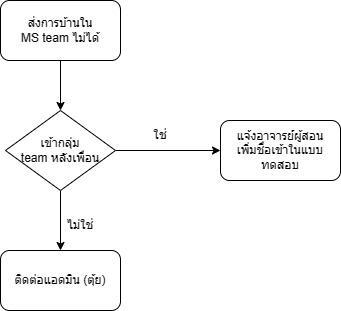

In [13]:
display_base64_image(images_b64[2])  